# Importing Dataset

First of all, I converted the the given dataset - 'Belgium dataset' csv format through pandas library for further data analysis

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import math

In [51]:
data = pd.read_csv("Belgium_Dataset.csv",encoding='latin-1')
data.head()  #first five observations of the data set

,Ship-to ID,Volume_2019_customer_level,Volume_2018_customer_level,sfdc_tier,poc_image,segment,sub_segment,Product_Set,Brand,Sub-Brand,Pack_Type,Returnalility,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019,Tax,province,Discount_Total
0,29000332,0.48,0.557,Tier 0,Mainstream,Entertainment Led,Events,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,141.20,0.00,0.0,0.48,12.23,Brussels Capital Region,0.00
1,29000441,0.45,0.540,Tier 1,Mainstream,Not applicable,Not applicable,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF TRIPLE,PIEDBOEUF,PIEDBOEUF TRIPLE,BOTTLE,RETURNABLE,113.65,0.00,0.0,0.45,7.85,Liège,0.00
2,29000452,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,OW_BULK_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BULK,OW,61551.06,14511.46,0.0,238.57,3577.69,Antwerp,14511.46
3,29000452,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,6001.00,1425.19,180.0,20.40,519.41,Antwerp,1605.19
4,29000452,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,RETURNABLE_KEG_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,KEG,RETURNABLE,3051.36,718.32,0.0,12.00,288.63,Antwerp,718.32


In [52]:
data.drop(columns="Ship-to ID" , inplace = True)
data.head()

,Volume_2019_customer_level,Volume_2018_customer_level,sfdc_tier,poc_image,segment,sub_segment,Product_Set,Brand,Sub-Brand,Pack_Type,Returnalility,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019,Tax,province,Discount_Total
0,0.48,0.557,Tier 0,Mainstream,Entertainment Led,Events,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,141.20,0.00,0.0,0.48,12.23,Brussels Capital Region,0.00
1,0.45,0.540,Tier 1,Mainstream,Not applicable,Not applicable,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF TRIPLE,PIEDBOEUF,PIEDBOEUF TRIPLE,BOTTLE,RETURNABLE,113.65,0.00,0.0,0.45,7.85,Liège,0.00
2,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,OW_BULK_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BULK,OW,61551.06,14511.46,0.0,238.57,3577.69,Antwerp,14511.46
3,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,6001.00,1425.19,180.0,20.40,519.41,Antwerp,1605.19
4,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,RETURNABLE_KEG_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,KEG,RETURNABLE,3051.36,718.32,0.0,12.00,288.63,Antwerp,718.32


In [53]:
print("Total Rows = " + str(data.shape[0]) + "\nTotal Columns = " + str(data.shape[1])) 

Total Rows = 39859
Total Columns = 18


Clearly, Dataset comprises of 39859 observations and 19 characteristics.

Out of which one (Total_Discount) is dependent variable and rest 18 are independent variables

# Exploratory Data Analysis

In [54]:
data.info() #columns and corresponding data types, finding whether they contain null values or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39859 entries, 0 to 39858
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Volume_2019_customer_level  39859 non-null  float64
 1   Volume_2018_customer_level  39859 non-null  float64
 2   sfdc_tier                   39859 non-null  object 
 3   poc_image                   39859 non-null  object 
 4   segment                     39859 non-null  object 
 5   sub_segment                 39859 non-null  object 
 6   Product_Set                 39859 non-null  object 
 7   Brand                       39859 non-null  object 
 8   Sub-Brand                   39859 non-null  object 
 9   Pack_Type                   39859 non-null  object 
 10  Returnalility               39859 non-null  object 
 11  GTO_2019                    39859 non-null  float64
 12  OnInvoice Discount(LCU)     39859 non-null  float64
 13  OffInvoice Discount(LCU)    398

No variable column has null/missing values.

In [55]:
data.describe()

,Volume_2019_customer_level,Volume_2018_customer_level,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019,Tax,Discount_Total
count,39859.000000,39859.000000,3.985900e+04,39859.000000,3.985900e+04,39859.000000,39859.000000,3.985900e+04
mean,125.514751,124.553338,2.329499e+03,296.258596,3.227985e+02,8.466336,196.776225,6.190571e+02
std,417.311600,434.081066,2.183562e+04,2215.120009,1.005300e+04,88.055689,1523.500791,1.050909e+04
min,-6.000000,-21.100000,-1.625964e+04,-1721.640000,-2.097762e+04,-18.600000,-442.540000,-2.087009e+04
25%,23.635000,24.200000,7.712000e+01,0.000000,0.000000e+00,0.237000,4.505000,6.540000e+00
50%,60.583000,59.332000,2.234700e+02,18.000000,0.000000e+00,0.600000,14.100000,3.370000e+01
75%,117.508000,117.687000,7.992400e+02,87.080000,1.643000e+01,2.340000,60.845000,1.422400e+02
max,14773.000000,11636.000000,2.727988e+06,214981.440000,1.260856e+06,11662.500000,153880.570000,1.260856e+06


Clearly, the dependent variable (Discount_total) is continous in nature

In [56]:
data.poc_image.unique()

array(['Mainstream', 'Premium', '0'], dtype=object)

<AxesSubplot:xlabel='poc_image', ylabel='count'>

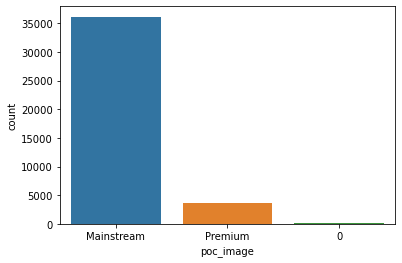

In [57]:
sns.countplot(x="poc_image", data= data)

In [58]:
(data.poc_image=='0').sum() 

80

In [72]:
#We need to drop the 80 entries with 0 poc_image

data = data.loc[data["poc_image"] != '0']
data.shape

(39779, 18)

In [61]:
#We can substitute poc_image with numerical values for easier analysis.

Poc_image = pd.get_dummies(data['poc_image'], drop_first = True)
Poc_image.head(5)

,Premium
0,0
1,0
2,0
3,0
4,0


Here, for sfdc_tier = 0 corresponds to 'Mainstream'and sfdc_tier = 1 corresponds to 'Premium'

In [73]:
data.sfdc_tier.unique()

array(['Tier 0', 'Tier 1', 'Tier 2'], dtype=object)

In [75]:
sfdc_tier = pd.get_dummies(data['sfdc_tier'], drop_first = True)
sfdc_tier.head(5)

,Tier 1,Tier 2
0,0,0
1,1,0
2,1,0
3,1,0
4,1,0


Clearly, Tier 1=0 and Tier 2=0 corresponds to Tier 3

In [63]:
data.segment.unique()

array(['Entertainment Led', 'Not applicable', 'Drink Led',
       'Institutional', 'Food Led', 'Wholesaler'], dtype=object)

In [64]:
data.sub_segment.unique()

array(['Events', 'Not applicable', 'Party Place', 'Institutional', 'Bar',
       'Restaurant', 'Sports Venue', 'Recreational', 'Beer bar', 'Hybrid',
       'Quick Dining', 'Music Venue', 'Cocktail Bar', 'Wholesaler',
       'Local Bar', 'Sub Agent'], dtype=object)

In [65]:
data.Product_Set.unique().shape

(143,)

In [76]:
data.Brand.unique()

array(['JUPILER', 'PIEDBOEUF', 'DIEKIRCH', 'BELLE VUE', 'HOEGAARDEN',
       'LEFFE', 'TRIPEL KARMELIET', 'GOOSE ISLAND', 'STELLA ARTOIS',
       'CORONA', 'VIEUX TEMPS', 'SCOTCH CTS', 'PURE BLONDE', 'CUBANISTO',
       'GINETTE', 'KWAK', 'BASS', 'KRUGER', "BECK'S", 'HORSE ALE',
       'GINDER-ALE', 'DEUS', 'SAFIR', 'BIRRA DEL BORGO'], dtype=object)

<AxesSubplot:xlabel='Brand', ylabel='count'>

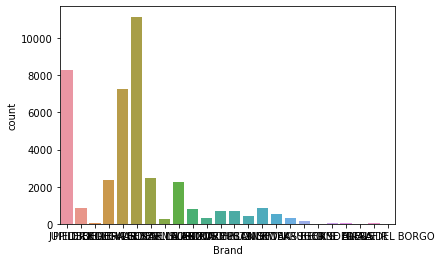

In [77]:
sns.countplot(x="Brand", data= data)

In [78]:
data.Pack_Type.unique()

array(['BOTTLE', 'BULK', 'KEG', 'CAN', 'PERFECTDRAFT'], dtype=object)

<AxesSubplot:xlabel='Pack_Type', ylabel='count'>

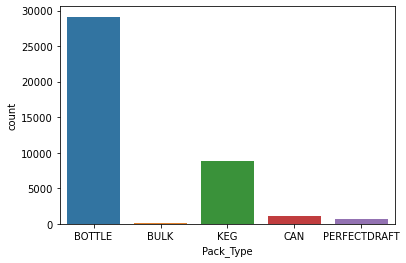

In [79]:
sns.countplot(x="Pack_Type", data= data)

In [68]:
data.Returnalility.unique()

array(['RETURNABLE', 'OW'], dtype=object)

<AxesSubplot:xlabel='Returnalility', ylabel='count'>

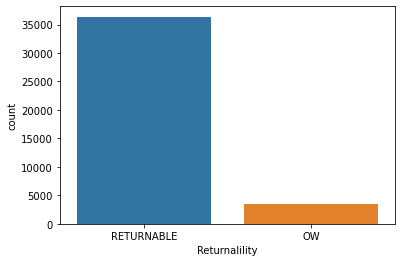

In [80]:
sns.countplot(x="Returnalility", data= data)

In [69]:
data.province.unique()

array(['Brussels Capital Region', 'Liège', 'Antwerp', 'Namur', 'Limburg',
       'Hainaut', 'East Flanders', 'Flemish Brabant', 'West Flanders',
       'Luxembourg', 'Walloon Brabant'], dtype=object)

<AxesSubplot:xlabel='province', ylabel='count'>

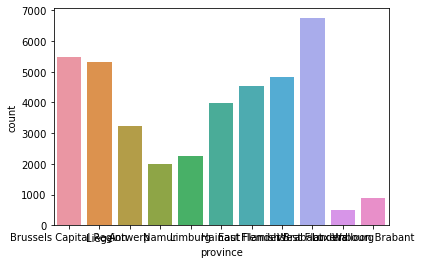

In [82]:
sns.countplot(x="province", data= data)

<AxesSubplot:ylabel='Frequency'>

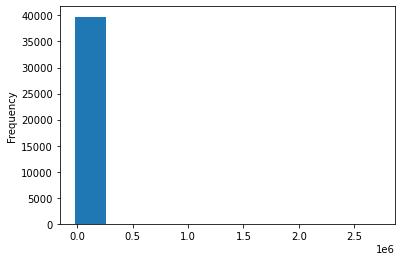

In [90]:
data["GTO_2019"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

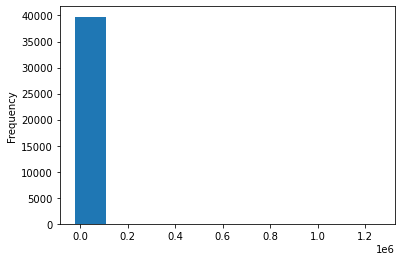

In [91]:
data["Discount_Total"].plot.hist()

In [71]:
print(data.corr(method = "pearson"))

                            Volume_2019_customer_level  \
Volume_2019_customer_level                    1.000000   
Volume_2018_customer_level                    0.961219   
GTO_2019                                      0.319300   
OnInvoice Discount(LCU)                       0.149615   
OffInvoice Discount(LCU)                      0.286719   
Volume_2019                                   0.309697   
Tax                                           0.227728   
Discount_Total                                0.305811   

                            Volume_2018_customer_level  GTO_2019  \
Volume_2019_customer_level                    0.961219  0.319300   
Volume_2018_customer_level                    1.000000  0.288709   
GTO_2019                                      0.288709  1.000000   
OnInvoice Discount(LCU)                       0.166480  0.396574   
OffInvoice Discount(LCU)                      0.254547  0.917402   
Volume_2019                                   0.278126  0.996513   
T

From this data, we can clearly see that Gross Turnover has a strong correlation with Off-invoice Discount, Volume, Tax and total discout.
Total discount has a strong correlation with GTO, OffInvoice Discount, 

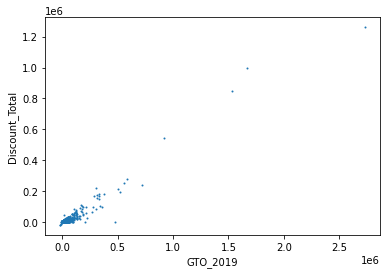

In [97]:
data.plot.scatter(x = 'GTO_2019', y = 'Discount_Total', s = 1);